In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from typing import *
import pickle
import os
import plotly.graph_objs as go
from plotly.offline import plot
import matplotlib

print(os.listdir())
try:
    import sys
    sys.path.append('./py_scripts/')
    from py_functions.pandas_utilities import get_pivot_confirmed_deceased,plot_confirmed_deceased,create_duration_boxplot
    print("Successfully imported functions and data.")
except:
    print("Core folder not found")
    exit()

['.git', '141.ipynb', 'data', 'py_functions', 'data_cleaning.ipynb', '.gitignore', 'html_reports', 'requirements.txt', 'covid_infections_map.html', 'covid_dashboard.html', 'README.md', 'data_visualization.ipynb', 'ydata_profiling_reports', '.vscode']
Invoking __init__.py for py_functions
Successfully imported functions and data.


In [2]:
# Load dataframes dictionary from the file
with open('/home/alessio-pc/PycharmProjects/anespo-DWWP.4/data/pickle_data/dataframes.pickle', 'rb') as file:
    dataframes = pickle.load(file)

# Verify the integrity of dataframes file
print(dataframes.keys())

# Set styles for plots
qualitative_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

palette = 'crest'
style = 'darkgrid'

font = {'family': 'serif', 'size': 12}

# Set seaborn palette and style
sns.set(palette=palette, style=style, font=font)
plt.rc('font', **font)

dict_keys(['case_df', 'patientinfo_df', 'policy_df', 'region_df', 'searchtrend_df', 'seoulfloating_df', 'time_df', 'timeage_df', 'timegender_df', 'timeprovince_df', 'weather_df'])


## Data Visualization

In this module (notebook), we will explore the relationships between various features and COVID cases. First, let's start by understanding the statistical population we are dealing with.

### Analysis of COVID-19 cases by Age and Gender

Let's start by understanding the basics of how the virus affects humans, at the level of age and gender.

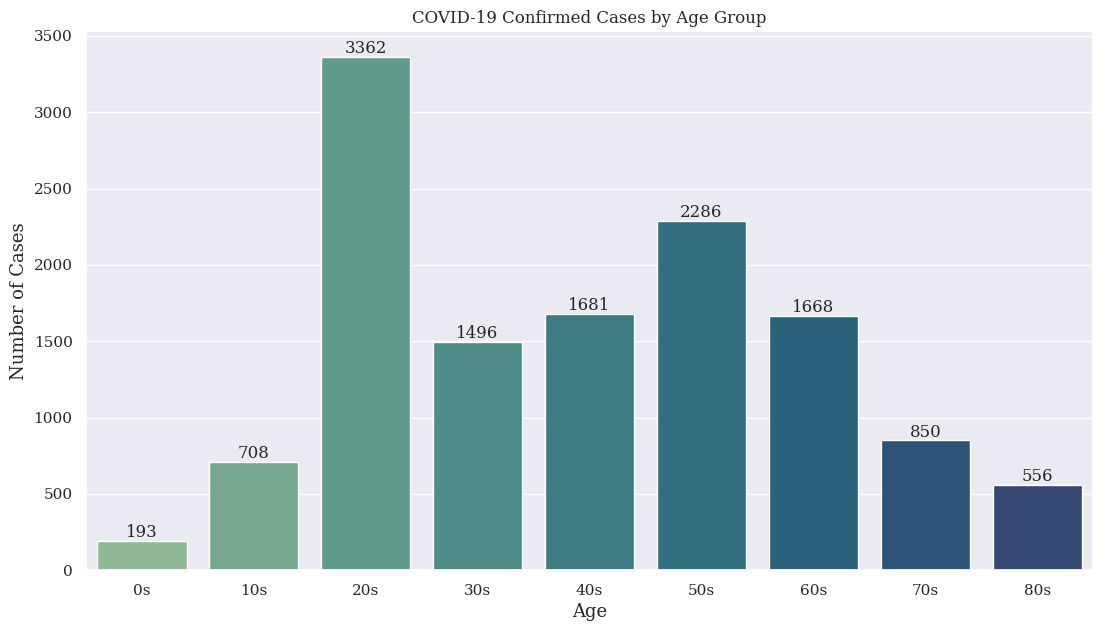

In [3]:
age_list = dataframes['timeage_df'].age.unique()

fig, ax = plt.subplots(figsize=(13, 7))
sns.barplot(x=age_list, y=dataframes['timeage_df'].confirmed[-9:], palette='crest')

# Add values on the columns
for i, v in enumerate(dataframes['timeage_df'].confirmed[-9:]):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.set_title("COVID-19 Confirmed Cases by Age Group")
ax.set_xlabel('Age', size=13)
ax.set_ylabel('Number of Cases', size=13)
plt.show()

Most of the affected people are in their 20s and 50s. We can visualize this corresponding data as a trend across the period of time we have available in our dataset 'timeage_df'.

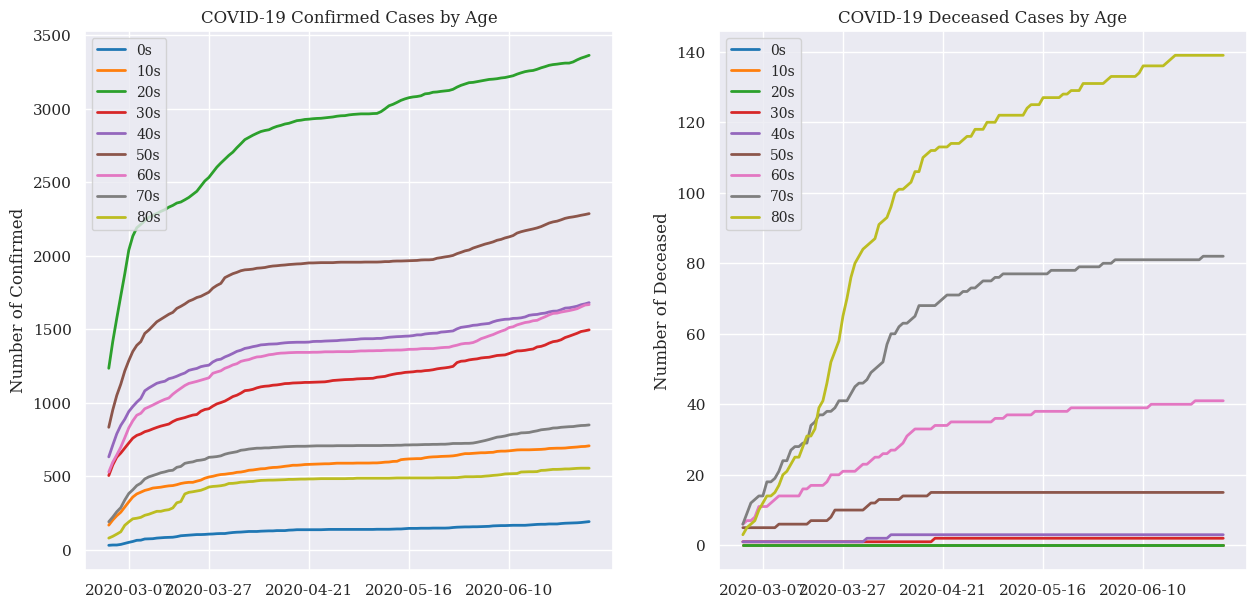

In [4]:
pivot_age = get_pivot_confirmed_deceased(dataframes['timeage_df'], 'age')
plot_confirmed_deceased(pivot_age)

We seem to have stumbled upon an important trend difference in the age of COVID-19 patients. Whereas younger people are more likely to be infected, older people are more likely to die from the disease.

In [5]:
dataframes['patientinfo_df']

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,age_numeric,state_by_gender,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,state_deceased
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaT,released,50,released_male,13 days,NaT,13 days,0
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaT,released,30,released_male,32 days,NaT,32 days,0
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaT,released,50,released_male,20 days,NaT,20 days,0
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaT,released,20,released_male,16 days,NaT,16 days,0
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaT,released,20,released_female,24 days,NaT,24 days,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,7000000011,male,30s,Korea,Jeju-do,Jeju-do,contact with patient,7000000009,5,NaN,2020-04-03,2020-05-19,NaT,released,30,released_male,46 days,NaT,46 days,0
5157,7000000012,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,9,NaN,2020-04-03,2020-05-05,NaT,released,20,released_female,32 days,NaT,32 days,0
5158,7000000013,female,10s,China,Jeju-do,Jeju-do,overseas inflow,NaN,6,NaN,2020-04-14,2020-04-26,NaT,released,10,released_female,12 days,NaT,12 days,0
5159,7000000014,female,30s,Korea,Jeju-do,Jeju-do,Itaewon Clubs,NaN,140,NaN,2020-05-09,2020-06-12,NaT,released,30,released_female,34 days,NaT,34 days,0


In [6]:
deceased_patients_df = dataframes['patientinfo_df'][dataframes['patientinfo_df']["state_deceased"] == 1]

mean_age_of_deceased = int(deceased_patients_df["age_numeric"].mean())
median_age_of_deceased = int(deceased_patients_df["age_numeric"].median())
std_age_of_deceased = int(deceased_patients_df["age_numeric"].std())
min_age_of_deceased = int(deceased_patients_df["age_numeric"].min())
max_age_of_deceased = int(deceased_patients_df["age_numeric"].max())

print(f"The mean age of those who died is {mean_age_of_deceased} +/- {std_age_of_deceased} years (median: {median_age_of_deceased}).")
print(f"The youngest patient who died was {min_age_of_deceased} years old.")
print(f"The oldest patient who died was {max_age_of_deceased} years old.")


The mean age of those who died is 70 +/- 12 years (median: 70).
The youngest patient who died was 30 years old.
The oldest patient who died was 90 years old.


In [7]:
# obtain mean age for confirmed cases
dataframes['timeage_df'].loc[:, 'age_numeric'] = dataframes['timeage_df']['age'].str[:-1].astype(int)

average_age = dataframes['timeage_df']['age_numeric'].describe()
print("Average age for confirmed cases:", average_age)
display()

Average age for confirmed cases: count    1089.000000
mean       40.000000
std        25.831752
min         0.000000
25%        20.000000
50%        40.000000
75%        60.000000
max        80.000000
Name: age_numeric, dtype: float64


In [8]:
group_age = dataframes['timeage_df'].groupby(['age'])[['confirmed', 'deceased']].sum()
group_age['mortality_rate'] = (  group_age['deceased'] / group_age['confirmed'] * 100).round(3).astype(str) + '%'
group_age

,confirmed,deceased,mortality_rate
age,,,
0s,16107,0,0.0%
10s,68752,0,0.0%
20s,345827,0,0.0%
30s,137539,194,0.141%
40s,168250,295,0.175%
50s,230030,1537,0.668%
60s,158505,3743,2.361%
70s,82107,7599,9.255%
80s,54086,12136,22.438%


The data is quite telling. We see how the average age of an infected patient is 40, with a std of 25, meaning the values within +/- 25 from age 40 make up about [66%](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) of the overall cases. But when we check the graph for cases over time, we find how the people above 70 years old are disproportionally afffected by COVID-19 in terms of cumulative deaths. The elderly are much more likely to die from COVID-19 than the younger ones, as the mean age of those who died is 70 with a std of 13.

Let's check if gender also plays a role in the differences.

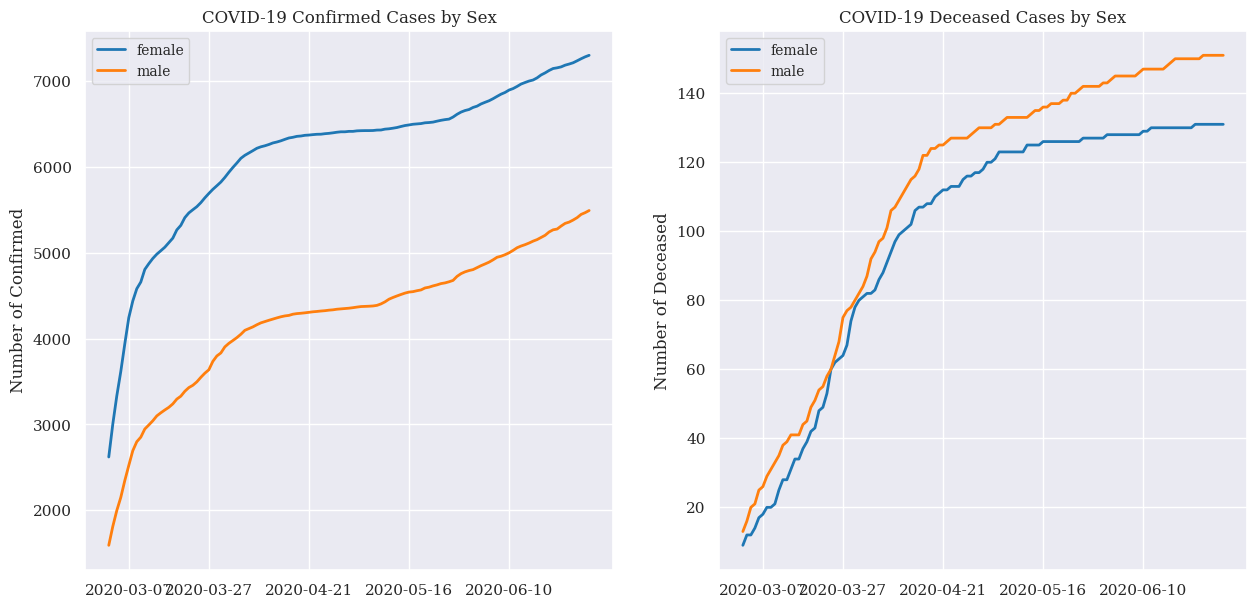

In [9]:
pivot_gender = get_pivot_confirmed_deceased(dataframes['timegender_df'], 'sex')
plot_confirmed_deceased(pivot_gender)

We see that the virus equally affects both genders. Lastly, we will check for the time span of COVID infections in the various provinces. 

## Analysis of COVID-19 cases by provinces

This is a crucial aspect of our investigation, as with matters such as spreading of a virus, the logistics and rationales behind how it moves are important to understand the best practices to contain it.

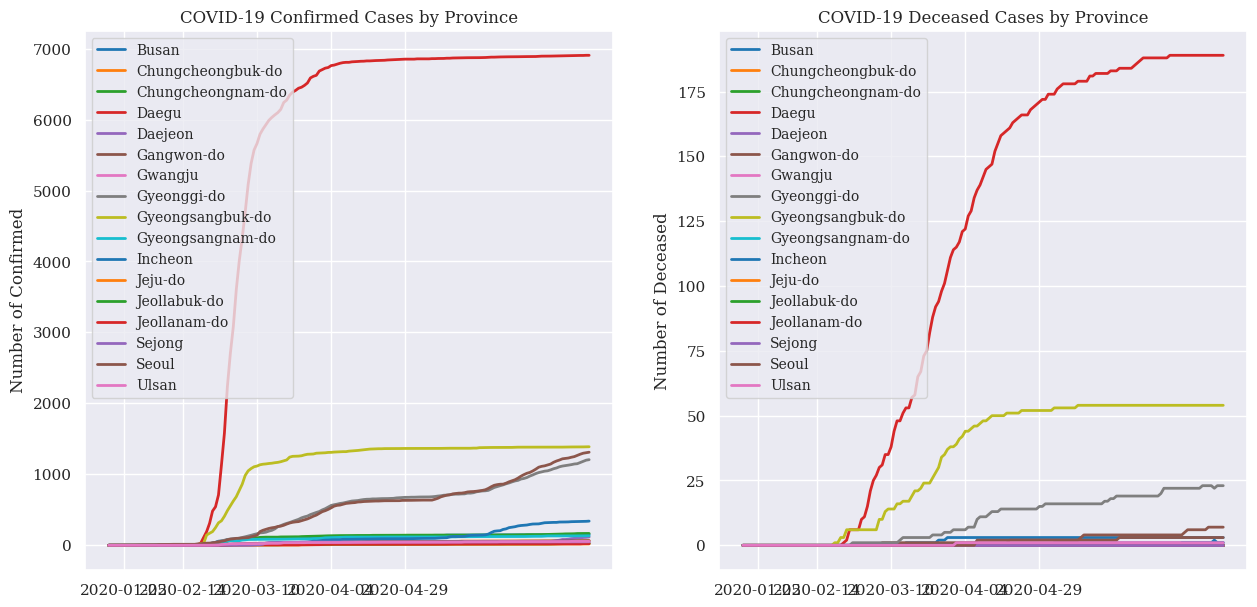

In [10]:
pivot_province = get_pivot_confirmed_deceased(dataframes['timeprovince_df'], 'province')
plot_confirmed_deceased(pivot_province)

In [11]:
group_province = dataframes['timeprovince_df'].groupby(['province'])[['confirmed', 'deceased']].sum()
group_province['mortality_rate'] = (  group_province['deceased'] / group_province['confirmed'] * 100).round(3).astype(str) + '%'
display(group_province)

,confirmed,deceased,mortality_rate
province,,,
Busan,16341,299,1.83%
Chungcheongbuk-do,5801,0,0.0%
Chungcheongnam-do,16780,0,0.0%
Daegu,807506,17624,2.183%
Daejeon,5217,58,1.112%
Gangwon-do,5908,225,3.808%
Gwangju,3359,0,0.0%
Gyeonggi-do,81059,1600,1.974%
Gyeongsangbuk-do,161079,5393,3.348%


It seems there is a province that is the most affected by COVID-19, namely the province of 'Daegu', although it has a lower mortality than the provinces of 'Gyeongsangbuk-do' and 'Gangwon-do'. Let's analyze these better.

In [12]:
dataframes['region_df'].drop(columns=['code','city', 'latitude', 'longitude']).groupby('province').sum()

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
province,,,,,,,
Busan,608,816,44,22.57,329.08,154.6,13504
Chungcheongbuk-do,518,656,34,12.28,278.31,141.9,5538
Chungcheongnam-do,818,998,42,17.96,381.51,187.3,7282
Daegu,458,710,22,15.42,153.28,71.7,10166
Daejeon,296,520,30,8.55,86.26,37.2,5968
Gangwon-do,698,736,36,21.22,434.92,220.0,5038
Gwangju,310,624,34,14.84,88.89,40.3,5704
Gyeonggi-do,2554,4474,122,45.46,461.75,194.7,40982
Gyeongsangbuk-do,942,1414,66,22.77,661.35,363.2,8948


This still doesn't make much sense, it seems Daegu is just a normal province with no more particular data than others. We need to investigate further. Perhaps a map can help us, since we have the coordinates of all of South Korea's provinces, we can easily do this using folium. This will give us an interactive map to check each province as we wish.

In [13]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins

# Create a base map centered at South Korea's coordinates
map_center = [35.9078, 127.7669]
mymap = folium.Map(location=map_center, zoom_start=7)

cases_provinces = dataframes['case_df'][['latitude', 'longitude', 'infection_case', 'confirmed', 'province']].dropna()
cases_provinces = cases_provinces[cases_provinces.latitude != '-'] 
cases_provinces = cases_provinces[cases_provinces.longitude != '-']

cases_provinces['longitude'] = cases_provinces['longitude'].astype('float')
cases_provinces['latitude'] = cases_provinces['latitude'].astype('float')

cases_provinces = cases_provinces.rename(columns = {'province':'Province', 'infection_case': 'Infection Case', 'latitude': 'Lat', 
                                                                    'longitude':'Long', 'confirmed': 'Infections'})
cases_provinces = cases_provinces.sort_values(by='Infections', ascending=False)

cases_provinces = cases_provinces[~cases_provinces['Lat'].isnull()]
cases_provinces = cases_provinces[~cases_provinces['Long'].isnull()]

# Create a MarkerCluster for better visualization of many points
marker_cluster = MarkerCluster().add_to(mymap)

# Add markers for each infection case
for index, row in cases_provinces.iterrows():
    lat, lon = row['Lat'], row['Long']
    province = row['Province']
    infection_case = row['Infection Case']
    infections = row['Infections']

    popup_text = f"Province: {province}<br>Infection Case: {infection_case}<br>Infections: {infections}"
    folium.Marker(location=[lat, lon], popup=popup_text).add_to(marker_cluster)

# Save the map as an HTML file
mymap.save("covid_infections_map.html")
display(mymap)

After a quick investigation over the province of Daegu, we can conclude we found out what the reason is: the Shincheonji Church was one of the main centres for the [spread of COVID-19 in Daegu](https://www.nytimes.com/2020/02/21/world/asia/south-korea-coronavirus-shincheonji.html), and is responsible for more than 4000 cases of COVID-19. This means that Daegu province will very likely see a higher increase in local cases in the future. Now let's check out the distribution of COVID-19 cases in other big cities and provinces. First we check where infections by groups around South Korea are, excluding the church outlier case.

Text(0.5, 1.0, 'Cases due to groups')

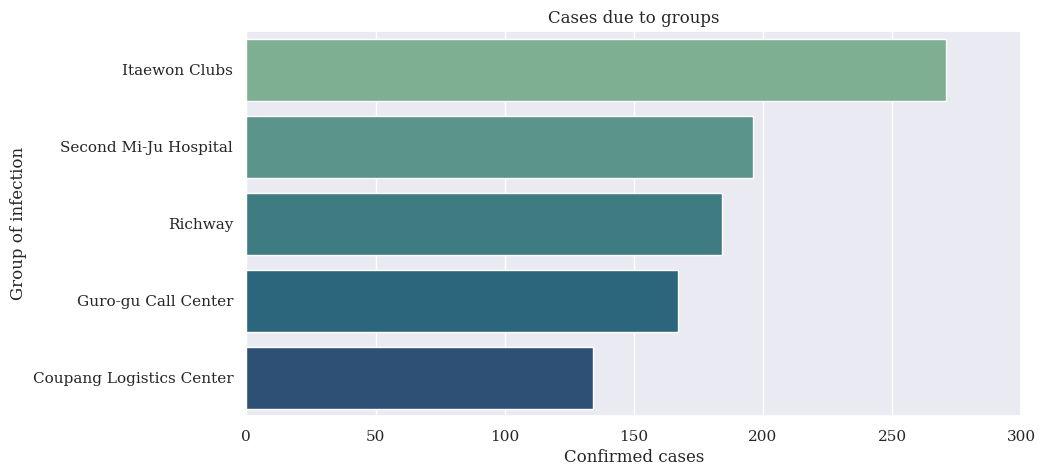

In [14]:
case_grp = dataframes['case_df'].query('group == True')
case_grp = case_grp[case_grp['infection_case'] != 'Shincheonji Church']

infection_case_grp = case_grp.pivot_table(index='infection_case', aggfunc='sum')['confirmed'].reset_index()
infection_case_grp = infection_case_grp.sort_values(by='confirmed',ascending=False)
infection_case_grp = infection_case_grp.head(5)

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x='confirmed', y='infection_case', data=infection_case_grp, ax=ax, palette=palette)
ax.set_xlim(0,300)
ax.set_ylabel('Group of infection')
ax.set_xlabel('Confirmed cases')
ax.set_title('Cases due to groups')

Now let's check for 2 big cities and provinces (Seoul and Gyeongsangbuk-do)

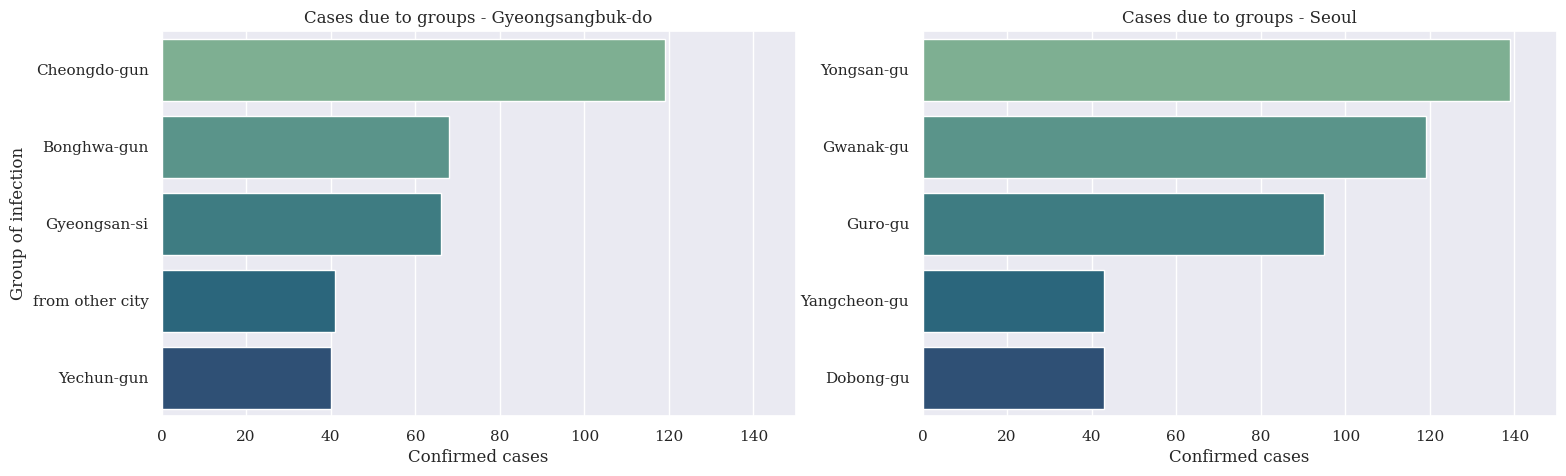

In [15]:
fig_dims = (18, 5)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=fig_dims)

# Plot for 'Gyeongsangbuk-do'
sns.barplot(x='confirmed', y='city', data=case_grp.loc[case_grp['province'] == 'Gyeongsangbuk-do'].head(), 
            ci=None, ax=ax1, palette=palette)
ax1.set_xlim(0, 150)
ax1.set_ylabel('Group of infection')
ax1.set_xlabel('Confirmed cases')
ax1.set_title('Cases due to groups - Gyeongsangbuk-do')

# Plot for 'Seoul'
sns.barplot(x='confirmed', y='city', data=case_grp.loc[case_grp['province'] == 'Seoul'].head(), 
            ci=None, ax=ax2, palette=palette)
ax2.set_xlim(0, 150)
ax2.set_ylabel('')  # Make y-label invisible
ax2.set_xlabel('Confirmed cases')
ax2.set_title('Cases due to groups - Seoul')

plt.show()


Seoul's cases are more evenly distributed although the numbers are still high. Gyeongsangbuk-do also has a high number of cases, with Cheondo-gun being the worst hit county. Let's quickly run through the cases coming from outer sources, therefore not coming from groups but from contacts either overseas or with infected individuals. 

In [16]:
other_cities_grp = dataframes['case_df'].query('group == False')
other_cities_grp = other_cities_grp.drop(columns=['city','group','latitude','longitude'],axis=1)
other_cities_grp.head()

,case_id,province,infection_case,confirmed
35,1000036,Seoul,overseas inflow,298
36,1000037,Seoul,contact with patient,162
37,1000038,Seoul,etc,100
45,1100008,Busan,overseas inflow,36
46,1100009,Busan,contact with patient,19


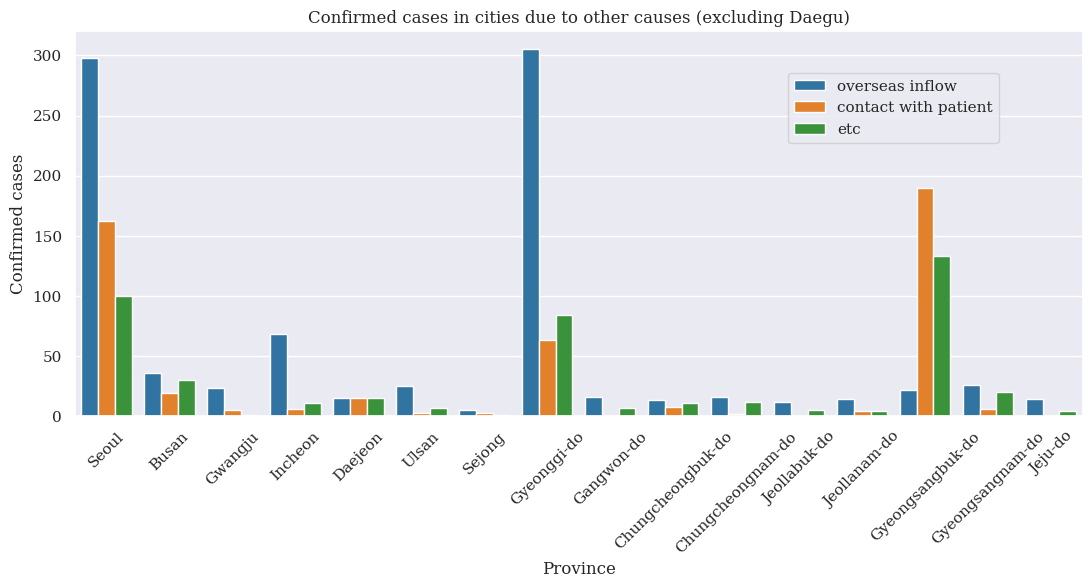

In [17]:
# Excluding Daegu as being outlier

fig, ax = plt.subplots(figsize=(13,5))

sns.barplot(x="province", y="confirmed", hue="infection_case", 
            data=other_cities_grp[other_cities_grp['province'] != 'Daegu'],
            palette=qualitative_colors, ax=ax)

ax.set_ylabel('Confirmed cases')
ax.set_xlabel('Province')
ax.set_title('Confirmed cases in cities due to other causes (excluding Daegu)')
ax.legend(loc='center left', bbox_to_anchor=(0.7, 0.8))

plt.xticks(rotation=45)
plt.show()

We can immediately see that the cases coming from an 'overseas_inflow' are the highest rated in confirmed cases coming from other sources, and that Seoul and Sejong are the ones with the highest numbers in that category.


From these findings, we can conclude that Daegu is the most affected city among all and is suffering by local transmission, mainly contacts with other patients, as the main cause of infections.

Seoul, despite being the province with the highest number of affected cities, has been able to control the spread of the virus really well. Having the most number of overseas inflow transmission, it can be concluded that it is a place where many tourists, unaware of being positive, decide to travel to.

Number of cases from local transmission is 6785 while cases from overseas is 3009, with 'contact with the patient' being the biggest cause for cases. Other reasons are still being investigated, but it is clear that the measures to put in place need to be both at local and international levels.

Other conclusions we can take from our overall analysis are that:

- Elderly are the most affected by the virus;
- Genders are equally affected by the virus;
- Gatherings of people are the main driver of the spread of COVID-19.

Locations such as hospitals or nursing homes are more likely to observe outbreaks, this could be a combination of the first and third point. Hospitals are locations where sick people go to, and with the elderly population being heavily affected from the virus and their immune system being weeaker than younger people, it makes sense that hospitals would see an increase as the probability of contacts with infected individuals increases there. These places, both hospitals and others such as clubs and working places, need to either be better monitored or to be closed for the time being.

Regarding tourism, it is clear that a large number of cases are due to overseas inflow of infected people. Given the unpredictability of the situation it is advisable to caution towards a ban on travel to avoid the spread of the virus both within and outside the country.

## Analysis on the effects of COVID-19 on individuals

Our conclusions will definitely take the aspects we mentioned above into consideration, but now let's check the distribution of positive and fatality rate of COVID-19 and other measures strictly related to the characteristic of COVID-19 infections.

In [18]:
positive_rate = (dataframes['time_df'].confirmed / dataframes['time_df'].test ) * 100
fatality_rate = (dataframes['time_df'].deceased / dataframes['time_df'].confirmed) * 100

# Create the traces for the plot
total_case = go.Bar(
    x=dataframes['time_df']['date'],
    y=dataframes['time_df']['confirmed'],
    name="Total confirmed Covid-19 cases",
    opacity=0.6,
    marker={'color': '#ed7b8e', 'line': {'color': 'White', 'width': 1}},
    yaxis='y2'
)

released_case = go.Bar(
    x=dataframes['time_df']['date'],
    y=dataframes['time_df']['released'],
    name="Total released Covid-19 cases",
    opacity=0.6,
    marker={'color': 'Green', 'line': {'color': 'White', 'width': 1}},
    yaxis='y2'
)

positivity = go.Scatter(
    x=dataframes['time_df']['date'],
    y=positive_rate,
    name="Covid-19 Positive Rate",
    marker={'color': '#136feb', 'line': {'color': 'Lavender', 'width': 2}}
)

fatality = go.Scatter(
    x=dataframes['time_df']['date'],
    y=fatality_rate,
    name="Covid-19 Fatality Rate",
    marker={'color': '#eb7713', 'line': {'color': 'Lavender', 'width': 2}}
)

layout = go.Layout(
    title={
        'text': '<b>South Korea Daily Covid-19 Cases (Jan.2020 - Jun.2020)</b>',
        'font': {
            'family': 'serif',
            'size': 20
        }
    },
    hovermode='x unified',
    xaxis={'title': 'Days'},
    yaxis={'title': 'Rate(%)'},
    yaxis2={'title': 'Covid-19 cases', 'overlaying': 'y', 'side': 'right'},
    showlegend=True
)


fig = go.Figure(data=[total_case, released_case, positivity, fatality], layout=layout)
fig.update_layout(
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.04),
    title_x=0.5
)

fig.show()


It is clear that the positivity rate has fallen dramatically after an initial peak, this is to be expected from a proper handling of the virus situation and is now stable at 1.001%. The fatality rate is also remaining stable at 2.203%, which is a very good result considering the number of cases in the country, although it is still a very high numbers, which we should remember means more than 1000 people have succumbed to the virus.

Let's see how the individuals on which we have data for cases are affected. 

In [19]:
states = pd.DataFrame(dataframes['patientinfo_df']["state"].value_counts())
states["status"] = states.index.str.title()
states.rename(columns={"state": "count"}, inplace=True)

custom_palette = ["#55A868","#426298","#DD8452"]

fig = px.pie(states,
             values="count",
             names="status",
             title='Current state of patients',
             template="seaborn",
             color_discrete_sequence=custom_palette)

fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.update_layout(
    width=800,
    height=500,
    title_font=dict(family="serif", size=16),
    legend={
        'font': {
            'family': 'serif',
            'size': 12
        }
    },
    font={
        'family': 'serif',
        'size': 12
    }
)

fig.show()


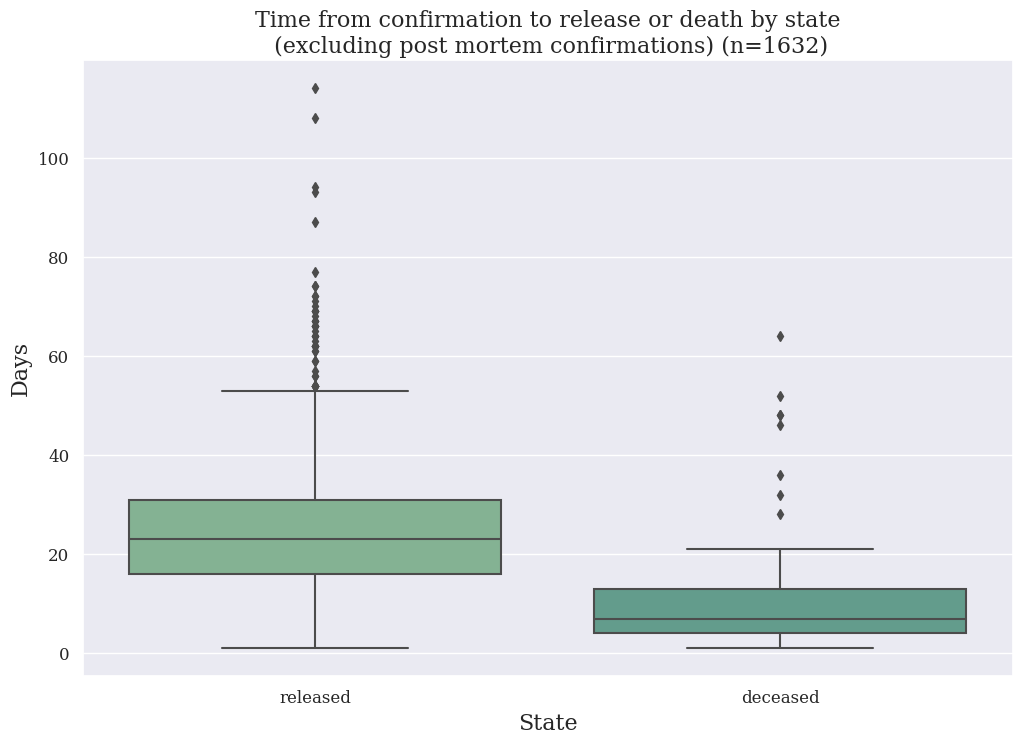

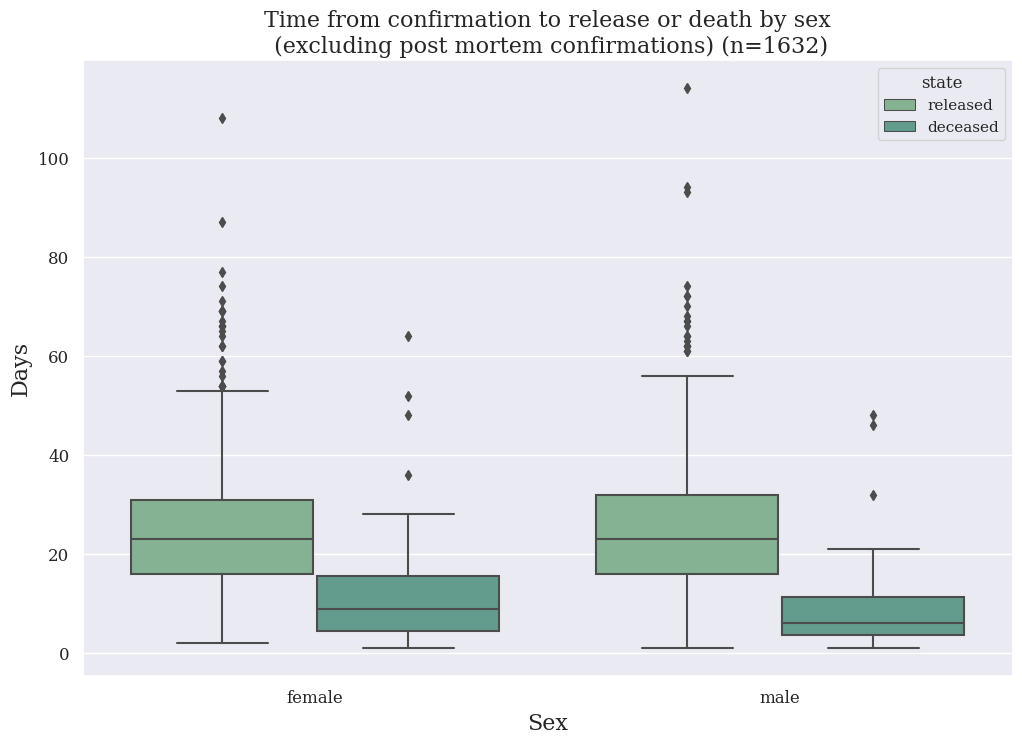

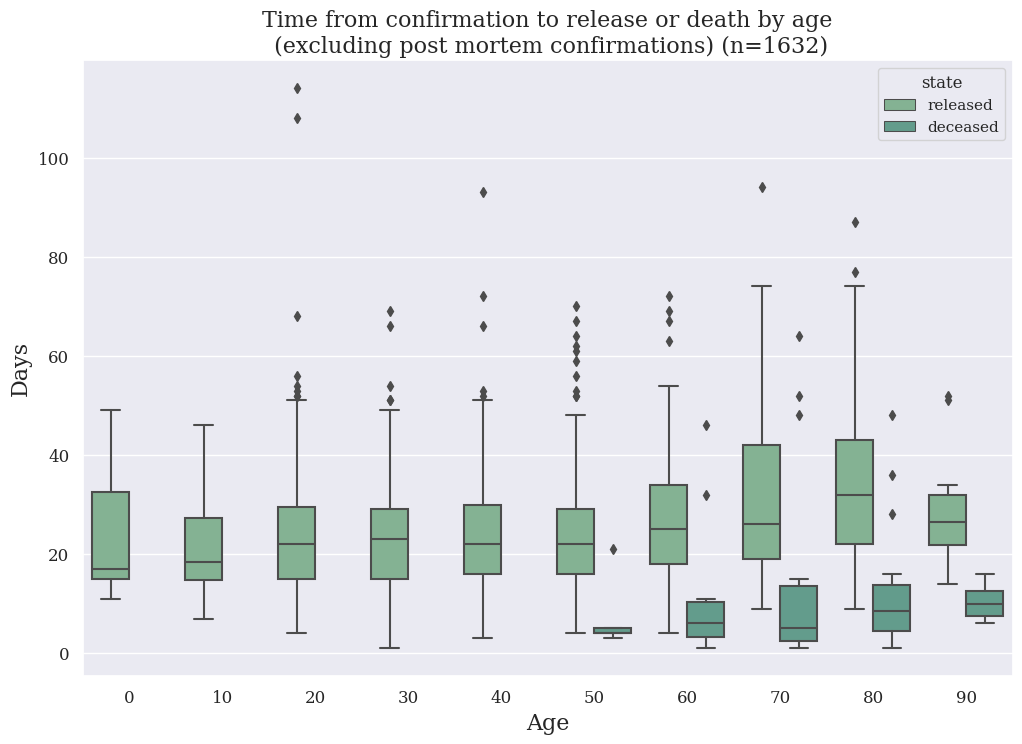

In [20]:
patients = dataframes['patientinfo_df']
patients["duration_days"] = patients["duration_since_confirmed"].dt.days
excl_post_mortem = patients.loc[(patients["time_to_death_since_confirmed"].astype("int64") > 0) |
                               (patients["time_to_release_since_confirmed"].astype("int64") > 0)]

# Duration boxplot
create_duration_boxplot(x="state", y="duration_days", order=["released", "deceased"], data=excl_post_mortem)

# Boxplot by gender
order_duration_sex = ["female", "male"]
create_duration_boxplot(x="sex", y="duration_days", order=order_duration_sex, hue="state", hue_order=["released", "deceased"], data=excl_post_mortem)

# Boxplot by age range
order_duration_age = sorted(patients["age_numeric"].unique())[:-1]
create_duration_boxplot(x="age_numeric", y="duration_days", order=order_duration_age, hue="state", hue_order=["released", "deceased"], data=excl_post_mortem)

The date the infection was confirmed that we have in our dataset does not represent the start of the infection or the symptoms, but it is the closest data we have, mainly when the infection is confirmed.

It is unknown how far the disease has progressed in each of the patients at the time of confirmation. However, this figure does underline the importance of seeking medical help early, when the first symptoms appear. 

In [21]:
nas_duration = patients['duration_days'].isna() 
no_nas_duration = patients[~nas_duration]
no_nas_duration = no_nas_duration.astype({'duration_days': 'int'})
no_nas_duration

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,...,released_date,deceased_date,state,age_numeric,state_by_gender,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,state_deceased,duration_days
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,...,2020-02-05,NaT,released,50,released_male,13 days,NaT,13 days,0,13
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,...,2020-03-02,NaT,released,30,released_male,32 days,NaT,32 days,0,32
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,...,2020-02-19,NaT,released,50,released_male,20 days,NaT,20 days,0,20
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,...,2020-02-15,NaT,released,20,released_male,16 days,NaT,16 days,0,16
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,...,2020-02-24,NaT,released,20,released_female,24 days,NaT,24 days,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,7000000011,male,30s,Korea,Jeju-do,Jeju-do,contact with patient,7000000009,5,NaN,...,2020-05-19,NaT,released,30,released_male,46 days,NaT,46 days,0,46
5157,7000000012,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,9,NaN,...,2020-05-05,NaT,released,20,released_female,32 days,NaT,32 days,0,32
5158,7000000013,female,10s,China,Jeju-do,Jeju-do,overseas inflow,NaN,6,NaN,...,2020-04-26,NaT,released,10,released_female,12 days,NaT,12 days,0,12
5159,7000000014,female,30s,Korea,Jeju-do,Jeju-do,Itaewon Clubs,NaN,140,NaN,...,2020-06-12,NaT,released,30,released_female,34 days,NaT,34 days,0,34


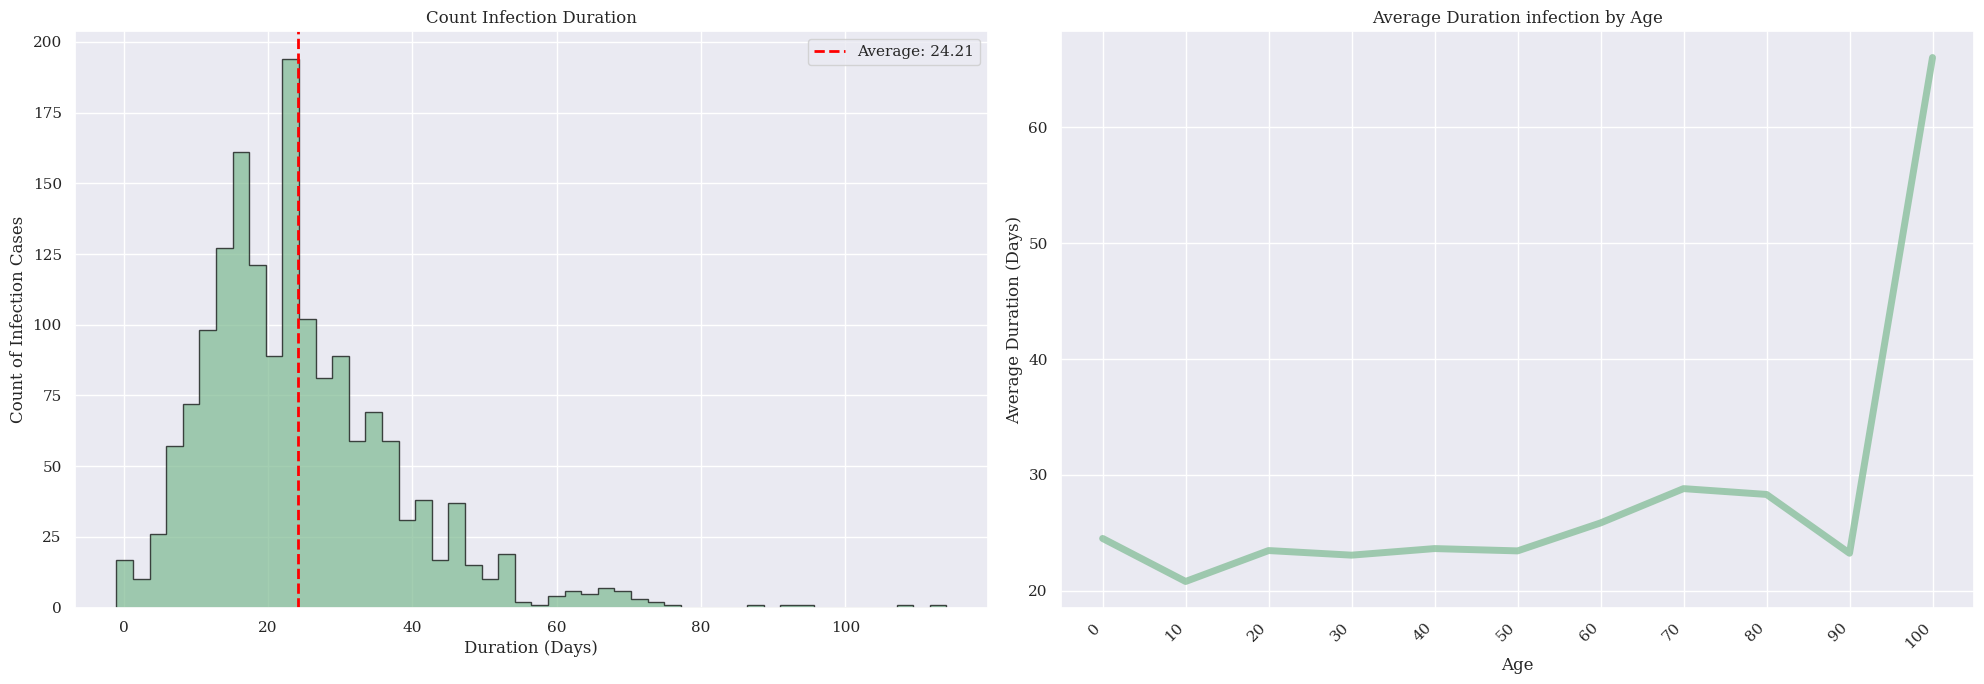

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# First graph
ax1 = axes[0]
ax1.hist(no_nas_duration['duration_days'], bins=50, 
         histtype='stepfilled', edgecolor='black',
         linewidth=1, alpha=0.7) 
ax1.set_ylabel('Count of Infection Cases')
ax1.set_xlabel('Duration (Days)')
ax1.set_title('Count Infection Duration')

# Calculate the average duration
avg_duration = no_nas_duration['duration_days'].mean()
ax1.axvline(avg_duration, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_duration:.2f}')
ax1.legend()

# Second graph
ax2 = axes[1]
avg_duration_by_province = patients.groupby('age_numeric')['duration_days'].mean()
ax2.plot(avg_duration_by_province.index, avg_duration_by_province.values, 
        linewidth=5, alpha=0.7)
ax2.set_xlabel('Age')
ax2.set_ylabel('Average Duration (Days)')
ax2.set_title('Average Duration infection by Age')
ax2.set_xticks(avg_duration_by_province.index)
ax2.set_xticklabels(avg_duration_by_province.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

We're now looking at the people being treated, and we checked how much time they needed to recover from the time they were diagnosed with the infection (positive coronavrius test) to when they were released. The time distribution for such people has a right distribution and most people needed between 15 and 23 days. Cases over a month are very rare, however, it has often happened that only a few days after diagnosis, people could already be considered healthy. The average duration day being around 24 days means during those days an individual should be very careful in their movements to avoid infecting others.

The average duration of the infection was also relative to the age of the patients, with elderly people being more likely to have a longer duration of infection.

Now we will take a look at how an individual might spread the virus through contact with other people.

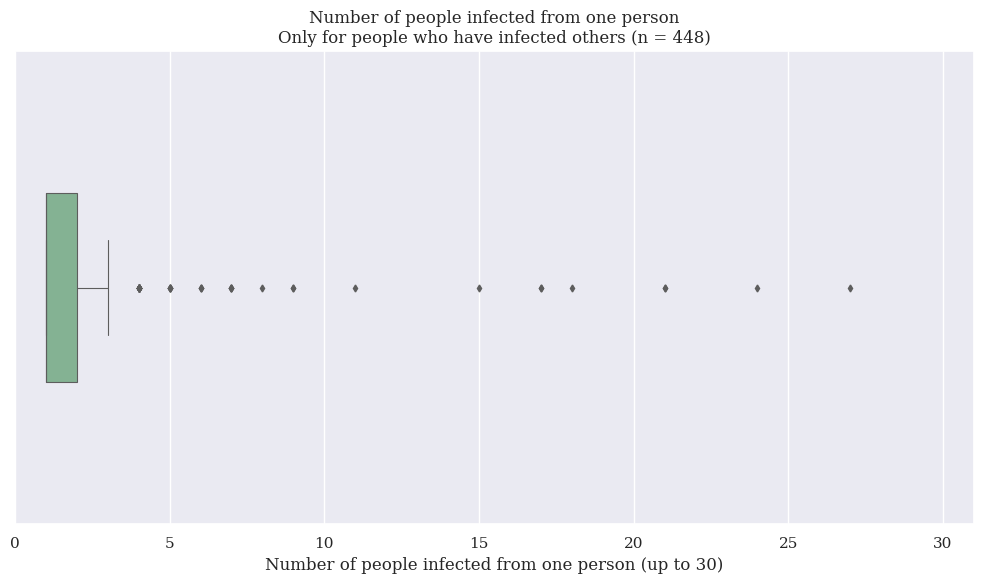

In [23]:
infections_peers = pd.DataFrame(patients['infected_by'].value_counts()).reset_index()
infections_peers.columns = ['ID', 'n']
infections_peers['ID'] = infections_peers['ID'].astype('category')

plt.figure(figsize=(10, 6))

sns.boxplot(x='n', data=infections_peers, width=0.4, linewidth=0.8, fliersize=3.5)

plt.xlim(1, 31)
plt.xticks(range(0, 31, 5))
plt.xlabel('Number of people infected from one person (up to 30)')
plt.ylabel('')
plt.title(f'Number of people infected from one person\nOnly for people who have infected others (n = {len(infections_peers)})')
plt.tight_layout()
plt.show()

For some people it can be clearly stated which person caused the infection. So far, it has not been found that anyone has infected more than 27 people and at the same time. More than half of the people who know that they have infected others have infected only one person.



In [24]:
nas_contact = np.logical_or(patients['contact_number'].isna(), patients['contact_number'] == '-')
no_nas_contact = patients[~nas_contact]
no_nas_contact = no_nas_contact.astype({'contact_number': 'int'})

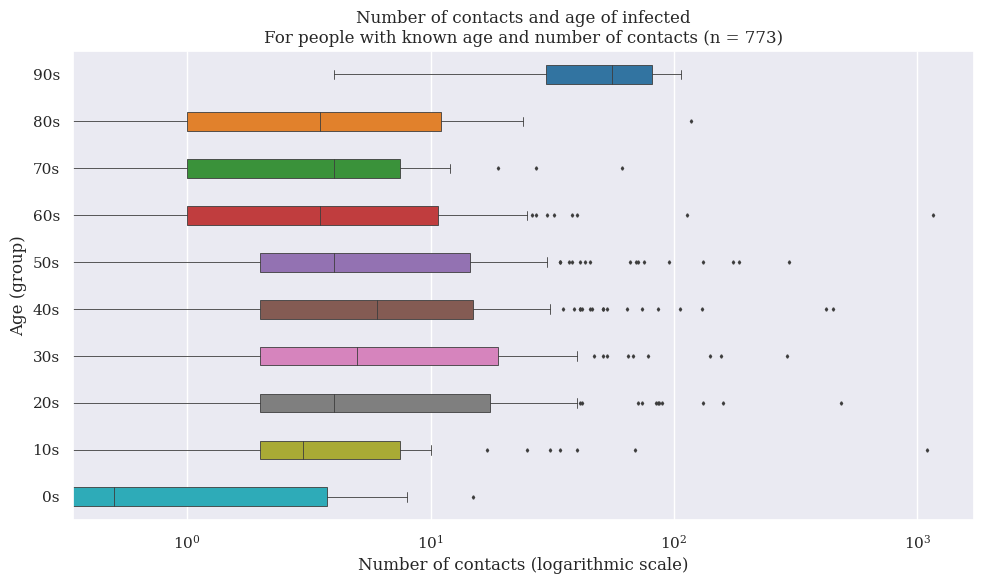

In [25]:
filtered_data = no_nas_contact.loc[no_nas_contact['contact_number'] < 100000].copy()
age_order = ["90s", "80s", "70s", "60s", "50s", "40s", "30s", "20s", "10s", "0s"]
filtered_data['age'] = pd.Categorical(filtered_data['age'], categories=age_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='contact_number', y='age', data=filtered_data, width=0.4, linewidth=0.6, fliersize=1.7, palette=qualitative_colors)
plt.xscale('log')
plt.xlabel('Number of contacts (logarithmic scale)')
plt.ylabel('Age (group)')
plt.title(f'Number of contacts and age of infected\nFor people with known age and number of contacts (n = {len(no_nas_contact)})')
plt.tight_layout()
plt.show()

When we look at age of the infected and the number of contacts they had, since we have this information only for a few people no exact conclusion can be drawn for the entire population. There is no clear relationship between age and the number of contacts. It's worth adding that a small number of people had a lot of contacts, which strongly affects the distribution.

From these latest visualizations we can say that:

- By the end of February, there was a rapid increase in confirmed COVID-19 cases in South Korea, but since then the number of new cases has been decreasing day by day,

- The most common reason for infection is contact with another already infected person, and a major driver are group meetings such as the Shinjochi Church event which led to thousands of infections.

- They are most often found in the most densely populated provinces of the country.

- The most frequently infected people are people between 20 and 30 years old and between 50 and 60 (slightly more often women than men).

- Recovery time is usually between 2 and 3.5 weeks (avg = 24 days).

- Information on the number of contacts is inaccurate and what little there is not sufficient Therefore, it's not possible to draw a meaningful conclusion, but we can imagine the number of contacts increasing for elderly people is a result of them being more taken care of by others.

## Analysis on policies

There have been many policies enacted by the South Korean government, and we want to check how they have fared against the passing of time and the infection

In [26]:
policy_types_count= dataframes['policy_df']['type'].value_counts().reset_index()
policy_types_count.rename({'type': 'Policies'}, axis=1, inplace=True)
policy_types_count

,Policies,count
0,Immigration,15
1,Education,15
2,Health,10
3,Technology,6
4,Social,5
5,Alert,4
6,Administrative,3
7,Transformation,3


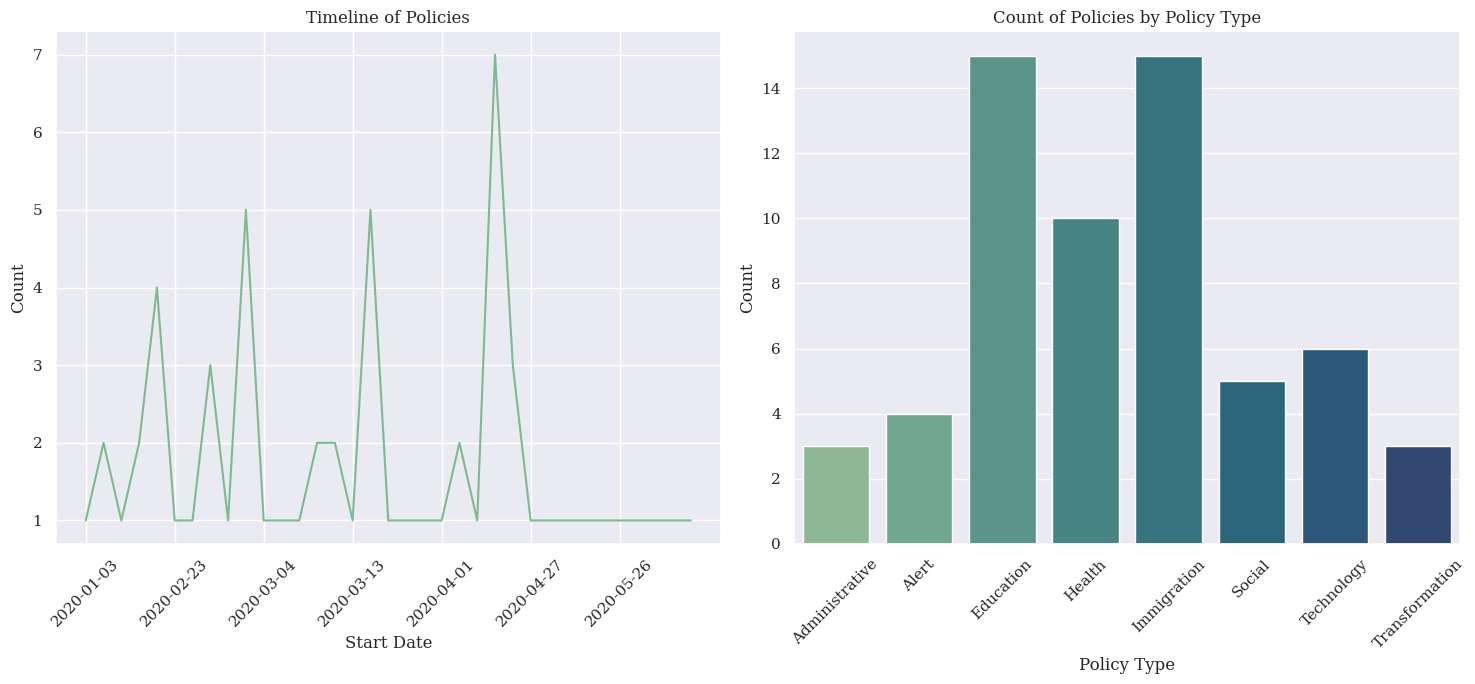

In [27]:
# Group policies by start date and count the number of policies
policy_counts_by_date = dataframes['policy_df'].groupby('start_date').size()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot the line chart
ax1.plot(policy_counts_by_date.index, policy_counts_by_date.values)
ax1.set_xlabel('Start Date')
ax1.set_ylabel('Count')
ax1.set_xticks(policy_counts_by_date.index[::5])
ax1.set_title('Timeline of Policies')
ax1.tick_params(axis='x', rotation=45)

policy_counts_by_country_type = dataframes['policy_df'].groupby('type').size()

# Plot the grouped bar chart
sns.barplot(x=policy_counts_by_country_type.index, y=policy_counts_by_country_type.values, palette=palette)
ax2.set_xlabel('Policy Type')
ax2.set_ylabel('Count')
ax2.set_title('Count of Policies by Policy Type')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


We can see how many of the policies were focused on education and immigration, with health following closely. The policies mainly took effect around March of 2020, which also coincides with the rapid drop in cases we saw earlier. Overall, we can say that these policies have been effective.

## Conclusions

At the end of this analysis, the major recommendations that we can give are:

- Avoid gatherings and meetings of more than 10 people;
- Wear masks to prevent the spread of the virus;
- Lookout for tourism or international traffic flow;
- Increase the security of hospitals and nursing homes;
- More attention should be given to elderly people who are more susceptible to the virus;
- Use the best measures to control the spread of the virus such as increasing testing facilities, and contact tracing.
- Deploy help precisely and rapidly, so that the infection has less probabilities to spread.

We hope that this analysis has been helpful and interesting, and that our recommendations can help prevent the spread of the virus in our country.